In [136]:
###### Import required libraries ######
import numpy as np
import matplotlib.pyplot as plt

In [99]:
###### Read all the 4 files #######
dataDir = folder_location

train_3 = []
train_5 = []
test_3 = []
test_5 = []

path = dataDir + "train3.txt"
for i in open(path, 'rt', encoding="utf8"):
    a = [1]
    a = a + [eval(k) for k in i.strip().split()]
    train_3.append(a)

path = dataDir + "train5.txt"
for i in open(path, 'rt', encoding="utf8"):
    a = [1]
    a = a + [eval(k) for k in i.strip().split()]
    train_5.append(a)
    
path = dataDir + "test3.txt"
for i in open(path, 'rt', encoding="utf8"):
    a = [1]
    a = a + [eval(k) for k in i.strip().split()]
    test_3.append(a)

path = dataDir + "test5.txt"
for i in open(path, 'rt', encoding="utf8"):
    a = [1]
    a = a + [eval(k) for k in i.strip().split()]
    test_5.append(a)
    

In [151]:
###### Sigmoid function ########
def sigmoid_func(z):
    return 1/(1+np.exp(-z))

##### define intial weights #######
def initial_weigths(cols):
    w = np.zeros((cols,1))
    theta_0=1
    return w,theta_0

##### define a function to train the model #####
def train_model(X,Y,learning_rate=0.01,no_of_iter=500, verbose=False):
    n=X.shape[0]
    m=X.shape[1]
    w,theta_0 = initial_weigths(n)
    assert w.shape == (n,1)
    assert Y.shape == (1,m)
    
    log_likelihood = []
    iterations = []
    for i in range(no_of_iter):
        z = np.dot(w.T,X) + theta_0
        Y_dash = sigmoid_func(z)
        assert Y_dash.shape == (1,m)
        
        log_lkl = np.sum((Y*np.log(Y_dash) + (1-Y)*np.log(1 - Y_dash)))
        log_likelihood.append(log_lkl)
        iterations.append(i+1)
        dw = np.dot(X,(Y_dash-Y).T)/m
        dtheta_0 = np.mean(Y_dash-Y)
        
        
        w -= learning_rate*dw
        theta_0 -= learning_rate*dtheta_0

    return {'thetas':w,'theta_0':theta_0,'log_likelihood':log_likelihood, 'iterations':iterations}


##### define the prediction function ##### 
def prediction(X,w,theta_0):
    z = np.dot(w.T,X) + theta_0
    Y_dash = sigmoid_func(z)
    return Y_dash

##### define error_rate ######
def error_rate(X_1,X_2,check_type = 'train'):
    X = np.array(X_1 + X_2)
    X=X.T
    Y = [0] *len(X_1)+ [1] *len(X_2)
    Y_pred = predict(X,model['thetas'],model['theta_0'])
    Y_pred = Y_pred.T
    Y_pred = [1 if i>=0.5 else 0 for i in Y_pred]
    pred_check = [i==j for i,j in zip(Y_pred,Y)]
    error_rate_3 = 1-np.mean(pred_check[:len(X_1)])
    error_rate_5 = 1-np.mean(pred_check[len(X_1):])
    error_rate = 1-np.mean(pred_check)
    print(f'The {check_type} error rate of images with 3 : {error_rate_3}')
    print(f'The {check_type} error rate of images with 5 : {error_rate_5}')
    print(f'The {check_type} error rate of all images : {error_rate}')

In [65]:
####### Define X_train and Y_train ########
X = np.array(train_3 + train_5)
X_train = X.T
Y = [0] *len(train_3)+ [1] *len(train_5)
Y_train = np.array(Y).reshape(1,-1)

In [147]:
###### train model #######
model = train_model(X_train,Y_train,0.2/len(X),1000001)

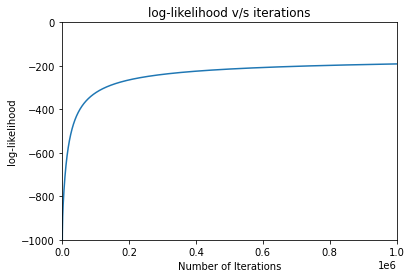

In [150]:
###### Plot the log-likelihood v/s iterations ######
plt.plot(model['iterations'],model['log_likelihood'])
plt.xlim(0, 1000500)
plt.ylim(-1000, 0)
plt.xlabel("Number of Iterations")
plt.ylabel("log-likelihood")
plt.title("log-likelihood v/s iterations")
plt.show()

In [163]:
print('The weight vector as 8x8 matrix:')
np.matrix(model['thetas'][1:].reshape(8,8))


The weight vector as 8x8 matrix:


matrix([[-0.60470675, -0.78887994, -0.86100446, -0.82919888, -0.75105498,
         -0.2013729 ,  0.68957485,  1.09219081],
        [ 0.03935594,  0.09789716,  0.04828843,  0.05116128, -0.00221456,
          0.31561287, -0.57406792, -0.89427206],
        [ 1.31202052,  1.1186664 ,  0.96482973,  0.40630282,  0.08643016,
         -1.15888706, -2.0471816 , -1.62177714],
        [ 0.6053017 ,  0.58552393,  0.29152213, -0.21189418, -0.55708352,
         -1.05405383, -0.17660504, -0.1822812 ],
        [ 0.32110364,  0.48899569,  0.01742376, -0.20000893, -0.482559  ,
         -0.39866576, -0.12017734, -0.37244975],
        [ 0.60530062, -0.02865446, -0.18296525,  0.05222597,  0.05928849,
         -0.21833949,  0.30319949, -0.73300691],
        [ 0.72153503, -0.08257795,  0.64384127,  0.25617096,  0.10070061,
         -0.07958903,  0.23348993, -0.58576441],
        [ 0.08477485,  0.08448797,  0.2580957 ,  0.33949602,  0.20988595,
          0.40634725, -0.03859284, -0.29061514]])

In [153]:
error_rate(test_3,test_5)

The train error rate of images with 3 : 0.05249999999999999
The train error rate of images with 5 : 0.040000000000000036
The train error rate of all images : 0.04625000000000001
